## Onset of COVID-19 in South Korea: EDA & Recommendations

COVID-19 arose as a pressing international health concern in 2020. The pandemic continues to this day. What's more, the COVID-19 pandemic jolted the world remember that we need to be prepared for pandemics of any other kind to arise as well. Health authorities found themselves unprepared when this pandemic struck, and now seek a way forward that can prevent unnecessary loss of life. 

Since John Snow's miraculous 1854 analysis and visualization of cholera cases in London, it has been clear that sober data analysis is a critical key to protecting public health and saving countless lives.

This notebook analyzes data from South Korea in the early months of the COVID-19 pandemic. Most of the data is from January 2020 through June 2020, though some lies outside of that range. With this analysis, I hope to make recommendations for broader policies around pandemics and public health. 

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from IPython.display import display
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim

## Data Cleaning

In [2]:
time_csv = "/Users/shanti/Downloads/archive (2)/Time.csv"
time_df = pd.read_csv(time_csv)
time_df.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [3]:
time_df.isna().sum()

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

There are no missing values in time_df.

In [4]:
policy_csv = '/Users/shanti/Downloads/archive (2)/Policy.csv'
policy_df = pd.read_csv(policy_csv)
policy_df['start_date'] = pd.to_datetime(policy_df['start_date'])
policy_df.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [5]:
policy_df.isna().sum()

policy_id      0
country        0
type           0
gov_policy     0
detail         2
start_date     0
end_date      37
dtype: int64

policy_df has some missing data in columns "detail" and "end_date." The "detail" entries are not highly important to my analysis, as most entries in "gov_policy" are self explanatory by their name. The absence of many "end_date" entries indicates these policies were still in effect at the time of data collection. 

In [6]:
age_csv = "/Users/shanti/Downloads/archive (2)/TimeAge.csv"
age_df = pd.read_csv(age_csv)
age_df.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [7]:
age_df.isna().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

There are no missing values in age_df.

In [8]:
gender_csv = "/Users/shanti/Downloads/archive (2)/TimeGender.csv"
gender_df = pd.read_csv(gender_csv)
gender_df.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [9]:
gender_df.isna().sum()

date         0
time         0
sex          0
confirmed    0
deceased     0
dtype: int64

There are no missing values in gender_df.

In [10]:
province_csv = "/Users/shanti/Downloads/archive (2)/TimeProvince.csv"
province_df = pd.read_csv(province_csv)
province_df.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [11]:
province_df.isna().sum()

date         0
time         0
province     0
confirmed    0
released     0
deceased     0
dtype: int64

There are no missing values in province_df.

## At A Glance

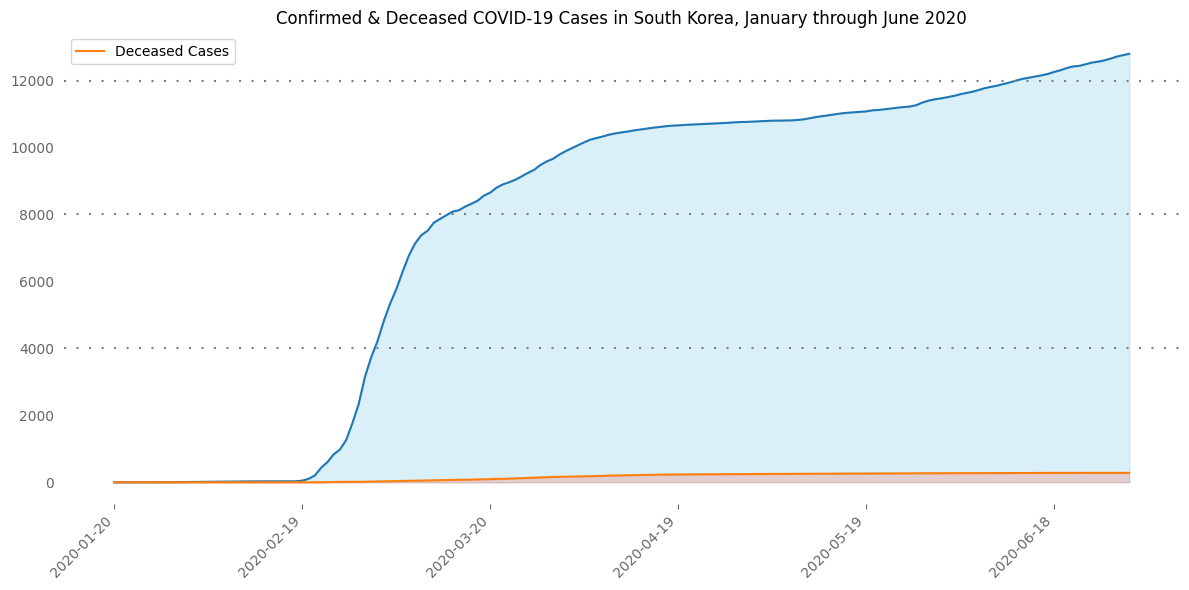

In [12]:
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.lineplot(data=time_df, x='date', y='confirmed')
sns.lineplot(data=time_df, x='date', y='deceased', label='Deceased Cases')

plt.fill_between(time_df['date'], time_df['confirmed'], color="skyblue", alpha=0.3)
plt.fill_between(time_df['date'], time_df['deceased'], color="salmon", alpha=0.3)

plt.title('Confirmed & Deceased COVID-19 Cases in South Korea, January through June 2020')
plt.xlabel('')
plt.ylabel('')
plt.yticks(alpha=0.6)
plt.xticks(rotation=45, alpha=0.6, ha='right')  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6)) # Reduce x-axis labels
sns.despine(left=True, bottom=True, right=True, top=True) # Remove spines

num_lines = 3
y_values = [val for val in plt.yticks()[0] if val != 0]  # Get y-tick values excluding 0
step = len(y_values) // (num_lines + 1)
for i in range(1, num_lines + 1):
    plt.axhline(y=y_values[i * step], color='gray', linestyle='dotted', dashes=(1, 5))

tick_color = (0, 0, 0, 0.6)  # RGBA tuple with alpha=0.6 for transparency
plt.gca().tick_params(axis='x', which='both', color=tick_color)
plt.gca().tick_params(axis='y', which='both', left=False)


plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Presented here is the cumulative COVID-19 infections and deaths from January through June 2020. 

Anallyzing the slope of the confirmed cases in this visualization, I see the steepest growth from late February to mid March. The steepness eases somewhat from mid March to mid April, then again from mid April through mid May. Can our data give us any clue as to what caused these changes in infection rate?

## Age Analysis

In [13]:
age_slice = age_df.iloc[-9:]
age_slice

,date,time,age,confirmed,deceased
1080,2020-06-30,0,0s,193,0
1081,2020-06-30,0,10s,708,0
1082,2020-06-30,0,20s,3362,0
1083,2020-06-30,0,30s,1496,2
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82
1088,2020-06-30,0,80s,556,139


In [14]:
age_groups = ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s']
deceased_total = age_slice['deceased'].tolist()
confirmed_total = age_slice['confirmed'].tolist()

age_groups_all = age_groups * 2
bar_types = ['deceased'] * len(age_groups) + ['confirmed'] * len(age_groups)

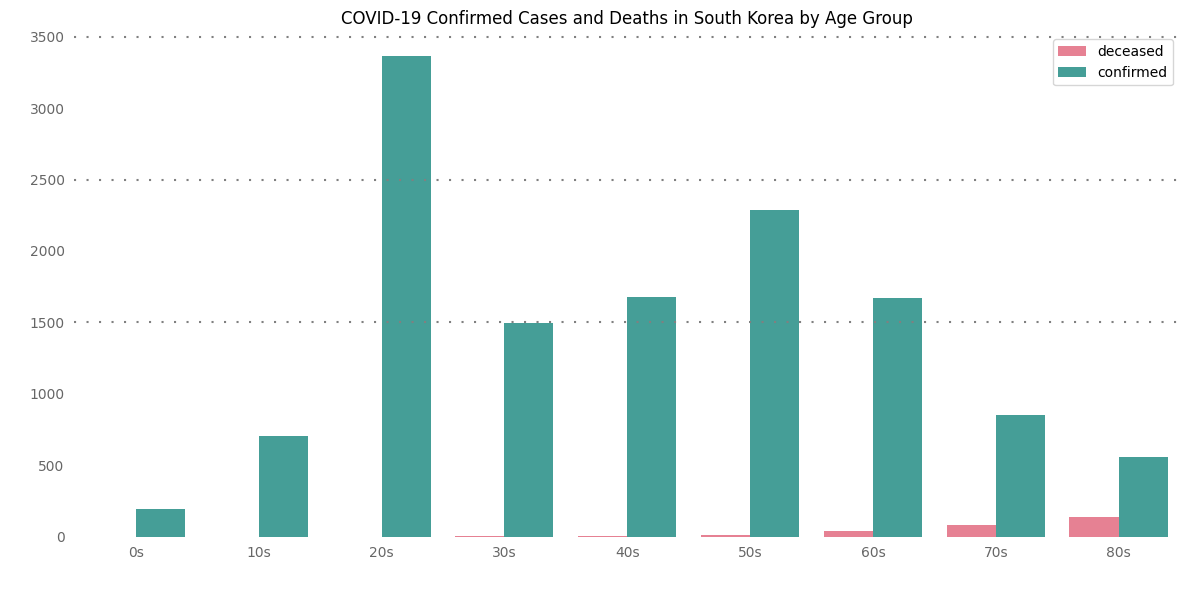

In [15]:
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(x=age_groups_all, y=deceased_total + confirmed_total, hue=bar_types, palette='husl')
plt.title('COVID-19 Confirmed Cases and Deaths in South Korea by Age Group')
plt.xlabel(' ')
plt.ylabel(' ')
plt.yticks(alpha=0.6)
plt.xticks(alpha=0.6)  # Rotate x-axis labels for better readability
sns.despine(left=True, bottom=True, right=True, top=True) # Remove spines
plt.gca().tick_params(axis='both', which='both', left=False, bottom=False)

num_lines = 3
y_values = [val for val in plt.yticks()[0] if val != 0]  # Get y-tick values excluding 0
step = len(y_values) // (num_lines + 1)
for i in range(1, num_lines + 1):
    plt.axhline(y=y_values[i * step], color='gray', linestyle='dotted', dashes=(1, 5))

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

It appears from this visualization that those in their 20s were the group most heavily infected, in most cases anywhere from twice as much to almost six times. However, no deaths were recorded in this age group. From age groups 30s onwards, we begin to see deaths, with death rate rising noticably in each successive age group.

We can dive deeper to learn about the infection rates and death rates by different age groups.

In [16]:
# Create a new DataFrame from the slice of the original DataFrame
age_slice = age_slice.copy()

# Add the new column to the new DataFrame
age_slice['death rate'] = (age_slice['deceased'] / age_slice['confirmed']) * 100
age_slice.drop(age_slice.columns[-2], axis=1, inplace=True)
age_slice

,date,time,age,confirmed,death rate
1080,2020-06-30,0,0s,193,0.000000
1081,2020-06-30,0,10s,708,0.000000
1082,2020-06-30,0,20s,3362,0.000000
1083,2020-06-30,0,30s,1496,0.133690
1084,2020-06-30,0,40s,1681,0.178465
1085,2020-06-30,0,50s,2286,0.656168
1086,2020-06-30,0,60s,1668,2.458034
1087,2020-06-30,0,70s,850,9.647059
1088,2020-06-30,0,80s,556,25.000000


With information sourced from the CIA World Factbook, I found estimates for the 2020 populations of each age group.

In [17]:
infect_rate_by_age_csv = "/Users/shanti/Desktop/2020.Est.South.Korea.Population.by.Age.Group.EDIT.csv"
infect_rate_by_age_df = pd.read_csv(infect_rate_by_age_csv)
infect_rate_by_age_df

,age group,male population,female population,total population,confirmed cases,infection rate
0,"""0s""",2118333,2000000,4118333,193,0.004686
1,"""10s""",2333334,2166667,4500001,708,0.015733
2,"""20s""",3500000,2743334,6243334,3362,0.053849
3,"""30s""",3666669,3166669,6833338,1498,0.021922
4,"""40s""",3916670,4020833,7937503,1684,0.021216
5,"""50s""",3888892,4944445,8833337,2301,0.026049
6,"""60s""",3011112,3150001,6161113,1709,0.027738
7,"""70s""",948890,1816666,2765556,932,0.033700
8,"""80s""",250001,1013890,1263891,695,0.054989


In [23]:
infect_rate_by_age_df = infect_rate_by_age_df.reset_index()
age_slice = age_slice.reset_index()

# Merge the two dataframes based on their index
death_infect_rate_df = pd.concat([infect_rate_by_age_df, age_slice['death rate']], axis=1)
death_infect_rate_df = death_infect_rate_df.drop(columns=['index'])

In [24]:
death_infect_rate_df.drop(death_infect_rate_df.columns[0], axis=1, inplace=True)
death_infect_rate_df

,age group,male population,female population,total population,confirmed cases,infection rate,death rate
0,"""0s""",2118333,2000000,4118333,193,0.004686,0.000000
1,"""10s""",2333334,2166667,4500001,708,0.015733,0.000000
2,"""20s""",3500000,2743334,6243334,3362,0.053849,0.000000
3,"""30s""",3666669,3166669,6833338,1498,0.021922,0.133690
4,"""40s""",3916670,4020833,7937503,1684,0.021216,0.178465
5,"""50s""",3888892,4944445,8833337,2301,0.026049,0.656168
6,"""60s""",3011112,3150001,6161113,1709,0.027738,2.458034
7,"""70s""",948890,1816666,2765556,932,0.033700,9.647059
8,"""80s""",250001,1013890,1263891,695,0.054989,25.000000


/var/folders/r2/xmpxgvj50sg7pp5s4c1378z80000gq/T/ipykernel_58681/3850907743.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([label.strip('"') for label in death_infect_rate_df['age group']], ha='right', va='top', alpha=0.6)


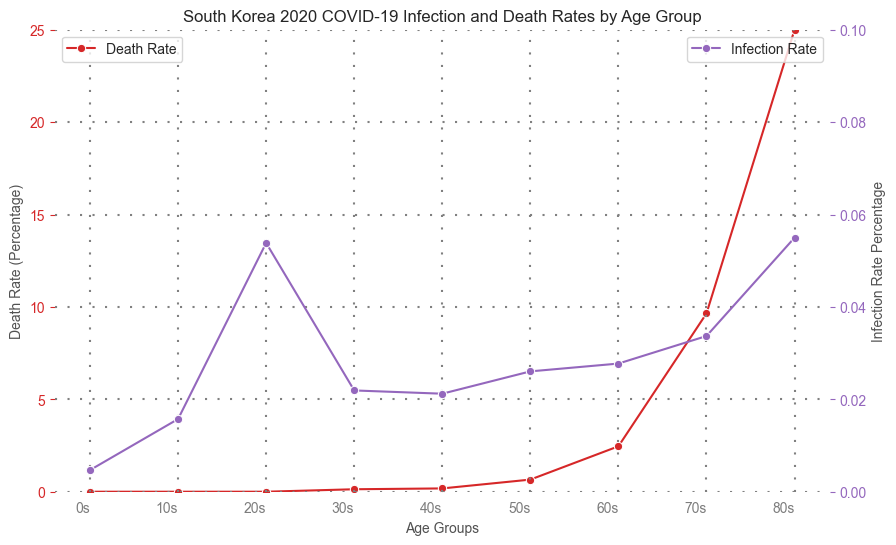

In [25]:
sns.set_style("white")

# Create the figure and the first subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the death rate
sns.lineplot(data=death_infect_rate_df, x='age group', y='death rate', ax=ax1, label='Death Rate', color='tab:red', marker='o')

# Set the y-axis limits for the death rate
ax1.set_ylim(0, 25)

# Set labels and title for the first subplot
ax1.set_xlabel('Age Groups', alpha=0.8)
ax1.set_ylabel('Death Rate (Percentage)', alpha=0.8)
ax1.set_title('South Korea 2020 COVID-19 Infection and Death Rates by Age Group')

# Rotate x-axis labels for better readability
ax1.set_xticklabels([label.strip('"') for label in death_infect_rate_df['age group']], ha='right', va='top', alpha=0.6)

# Create the second subplot sharing the same x-axis
ax2 = ax1.twinx()

# Plot the infection rate on the secondary y-axis
sns.lineplot(data=death_infect_rate_df, x='age group', y='infection rate', ax=ax2, label='Infection Rate', color='tab:purple', marker='o')

# Set the y-axis limits for the infection rate
ax2.set_ylim(0, 0.1)

# Set labels for the second subplot
ax2.set_ylabel('Infection Rate Percentage', alpha=0.8)

sns.despine(left=True, bottom=True, right=True, top=True)

for tick in ax1.get_xticks():
    ax1.axvline(x=tick, color='gray', linestyle='dotted', dashes=(1, 5))
    
for tick in ax1.get_yticks():
    ax1.axhline(y=tick, color='gray', linestyle='dotted', dashes=(1, 5))
#for tick in ax2.get_yticks():
    #ax2.axhline(y=tick, color='gray', linestyle='--', alpha=0.7)

ax1.tick_params(axis='y', colors='tab:red')
ax2.tick_params(axis='y', colors='tab:purple')


# Show legend for both subplots
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

Infection rate seems to rise steadily throughout most of one's life, but spikes intensely during one's 20s. After leveling back to just a slow and steady increase in middle ago, 80s once again shows a sharp rise of infection rate. Those in their 80s appear to experience a similar spike of infection rate as those in their 20s. Could these two stages of life have something in common when it comes to infection risk, or is the rise of infection risk in one's 80s part of a general decline of health with aging?

One hypothesis is that those in their 20s and those in their 80s encounter more people in closer quarters than those in other age groups. This makes sense because both of these age groups are more likely to live communally than those in other decades, due to attending university or living in a nursing home. They also are somewhat less likely to have the responsibilites of a nuclear family than those in other eras of life, leaving open time for more social connections.

Death rate remains barely perceptible on this visual until it begins a slow climb in the 30s, followed by much sharper climbs in 60s, 70s, and 80s. Those in their 80s can be seen in this data to have the greatest risk of death from a COVID-19 infetion, with a shocking 25% death rate. 

## Gender Analysis

In [26]:
gender_slice = gender_df.iloc[-2:]
gender_slice = gender_slice.copy()
gender_slice

,date,time,sex,confirmed,deceased
240,2020-06-30,0,male,5495,151
241,2020-06-30,0,female,7305,131


In [27]:
gender_groups = ['Male', 'Female']
gender_deceased_total = gender_slice['deceased'].tolist()
gender_confirmed_total = gender_slice['confirmed'].tolist()

gender_groups_all = gender_groups * 2
bar_types = ['deceased'] * len(gender_groups) + ['confirmed'] * len(gender_groups)

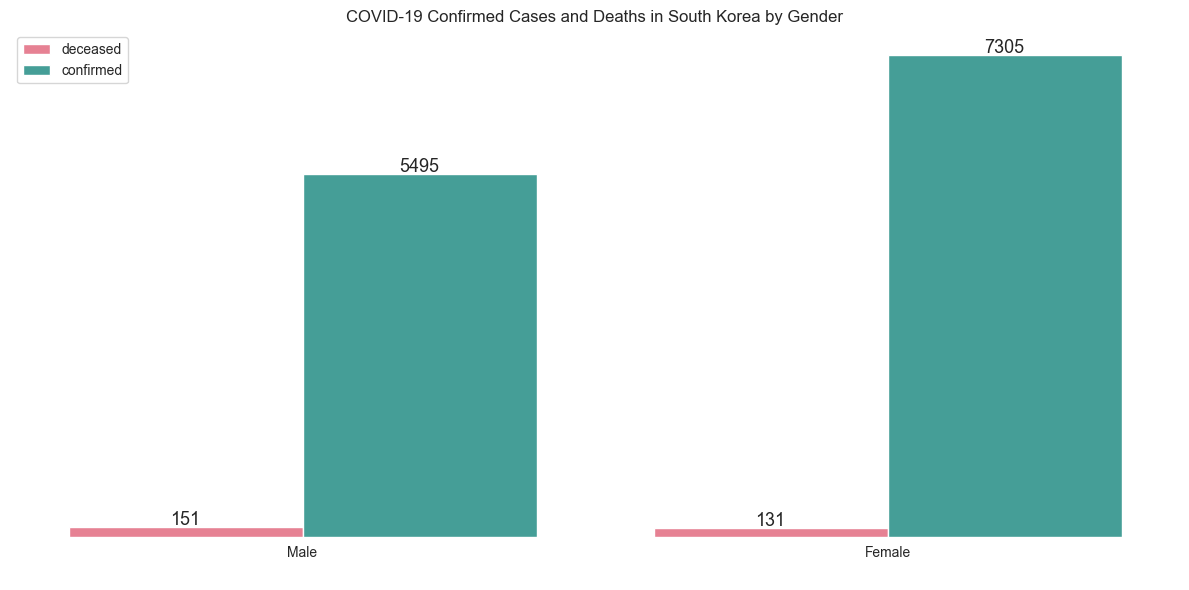

In [28]:
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
barplot = sns.barplot(x=gender_groups_all, y=gender_deceased_total + gender_confirmed_total, hue=bar_types, palette='husl')
plt.title('COVID-19 Confirmed Cases and Deaths in South Korea by Gender')
plt.xlabel(' ')
plt.ylabel('')  # Remove y-axis label

# Remove y-axis ticks and labels
plt.gca().tick_params(axis='y', which='both', left=False, labelleft=False)
plt.gca().tick_params(axis='x', which='both', left=False, bottom=False)  # Remove x ticks

# Add labels to each bar
for p in barplot.patches:
    if p.get_height() != 0:  # Skip annotating zero values
        barplot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         fontsize=13,  # Adjust font size as needed
                         xytext=(0, 5), 
                         textcoords='offset points')

sns.despine(left=True, bottom=True, right=True, top=True) # Remove spines

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [29]:
gender_slice['death_rate_by_gender'] = (gender_slice['deceased'] / gender_slice['confirmed']) * 100
gender_slice

,date,time,sex,confirmed,deceased,death_rate_by_gender
240,2020-06-30,0,male,5495,151,2.747953
241,2020-06-30,0,female,7305,131,1.793292


According to this data, women were more likely to be infected, but 1.5 times less likely to die from the illness. I can't reach particular conclusions about the reasons for this; they are likely numerous and varied.

## Province Analysis

In [30]:
province_slice=province_df.iloc[-17:]
province_slice

,date,time,province,confirmed,released,deceased
2754,2020-06-30,0,Seoul,1312,985,7
2755,2020-06-30,0,Busan,154,142,3
2756,2020-06-30,0,Daegu,6906,6700,189
2757,2020-06-30,0,Incheon,341,290,1
2758,2020-06-30,0,Gwangju,44,32,0
2759,2020-06-30,0,Daejeon,117,44,1
2760,2020-06-30,0,Ulsan,55,50,1
2761,2020-06-30,0,Sejong,50,47,0
2762,2020-06-30,0,Gyeonggi-do,1207,931,23
2763,2020-06-30,0,Gangwon-do,65,54,3


In [31]:
provinces = [
    'Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon', 'Ulsan', 'Sejong',
    'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 'Chungcheongnam-do',
    'Jeollabuk-do', 'Jeollanam-do', 'Gueongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'
]

In [32]:
province_deceased_total = province_slice['deceased'].tolist()
province_confirmed_total = province_slice['confirmed'].tolist()

all_provinces = provinces * 2
bar_types = ['deceased'] * len(provinces) + ['confirmed'] * len(provinces)

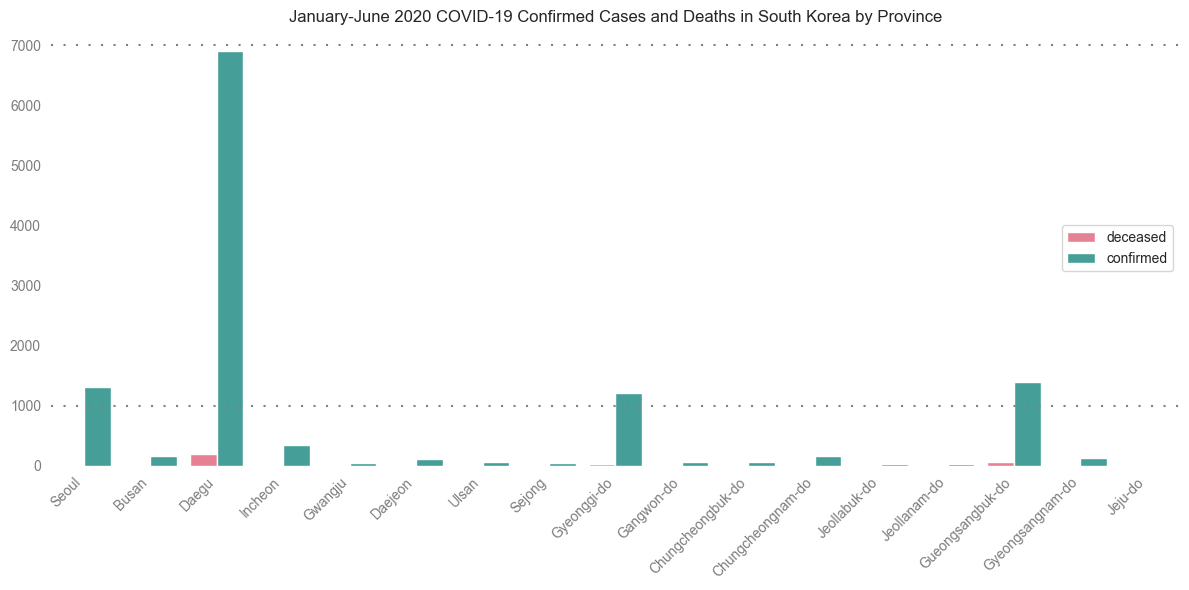

In [33]:
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(x=all_provinces, y=province_deceased_total + province_confirmed_total, hue=bar_types, palette='husl')
plt.title('January-June 2020 COVID-19 Confirmed Cases and Deaths in South Korea by Province')
#plt.xlabel('Date')
#plt.ylabel('Confirmed Cases')
plt.yticks(alpha=0.6)
plt.xticks(rotation=45, ha='right', alpha=0.6)  # Rotate x-axis labels for better readability

sns.despine(left=True, bottom=True, right=True, top=True) # Remove spines
plt.gca().tick_params(axis='both', which='both', left=False)

plt.axhline(y=1000, color='gray', linestyle='dotted', dashes=(1, 5))
plt.axhline(y=7000, color='gray', linestyle='dotted', dashes=(1, 5))


plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Daegu province appears to represent an outlier, massively outshowing other provinces in both confirmed cases and deaths. Through investigating the data and taking a look at the news, I determined Daegu was the location of the Shincheonji Church outbreak. This was the largest individual outbreak in our dataset, and it showed up all over the country. We will dive deeper into this later. But what does our chart look like without Daegu?

In [34]:
filtered_provinces = province_slice[province_slice['province'] != 'Daegu']
filtered_provinces = filtered_provinces[-16:]

filtered_provinces_list = [
    'Seoul', 'Busan', 'Incheon', 'Gwangju', 'Daejeon', 'Ulsan', 'Sejong',
    'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 'Chungcheongnam-do',
    'Jeollabuk-do', 'Jeollanam-do', 'Gueongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'
]

In [35]:
filtered_provinces_deceased = filtered_provinces['deceased'].tolist()
filtered_provinces_confirmed = filtered_provinces['confirmed'].tolist()

all_provinces_filtered = filtered_provinces_list * 2
bar_types = ['deceased'] * len(filtered_provinces) + ['confirmed'] * len(filtered_provinces)

desired_y_ticks = [100, 300, 500, 700, 900, 1100, 1300]

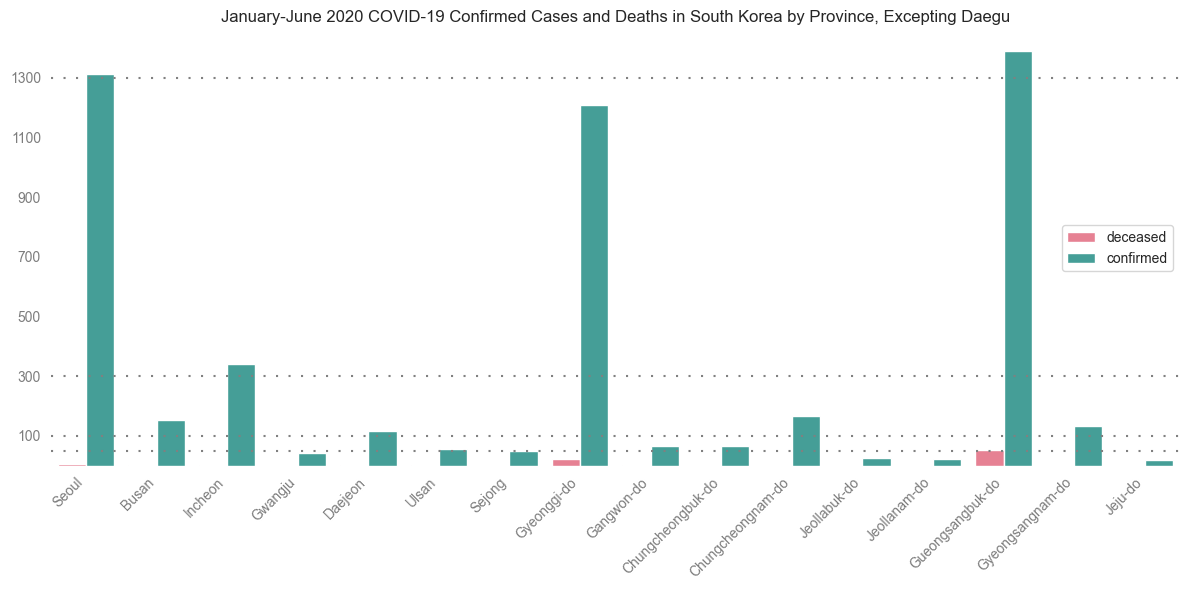

In [36]:
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(x=all_provinces_filtered, y=filtered_provinces_deceased + filtered_provinces_confirmed, hue=bar_types, palette='husl')
plt.title('January-June 2020 COVID-19 Confirmed Cases and Deaths in South Korea by Province, Excepting Daegu')
#plt.xlabel('Date')
#plt.ylabel('Confirmed Cases')
plt.yticks(desired_y_ticks, alpha=0.6)
plt.xticks(rotation=45, ha='right', alpha=0.6)  # Rotate x-axis labels for better readability

sns.despine(left=True, bottom=True, right=True, top=True) # Remove spines
plt.gca().tick_params(axis='both', which='both', left=False)

plt.axhline(y=50, color='gray', linestyle='dotted', dashes=(1, 5))
plt.axhline(y=100, color='gray', linestyle='dotted', dashes=(1, 5))
plt.axhline(y=300, color='gray', linestyle='dotted', dashes=(1, 5))
plt.axhline(y=1300, color='gray', linestyle='dotted', dashes=(1, 5))

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

It feels relevant that the highest recorded confirmed cases and deaths in this visual is Gueongsangbuk-do, which is geographically quite near Daegu. Looking at the data, 566 of Gueongsangbuk-do's recorded 1324 cases (42.7%) came from the Shincheonji Church outbreak, making it by far the biggest single source of infections in Gueongsangbuk-do.

## Infection Sources

In [37]:
biggest_cases_3_csv = "/Users/shanti/Downloads/archive (2)/SouthKoreaBiggestCovidCases.200Plus.csv"
biggest_cases_3_df = pd.read_csv(biggest_cases_3_csv)
biggest_cases_3_df

,Case,Confirmed
0,Shincheonji Church,5123
1,Contact with patient,1403
2,Overseas inflow,949
3,Itaewon Clubs,271
4,Other,2467


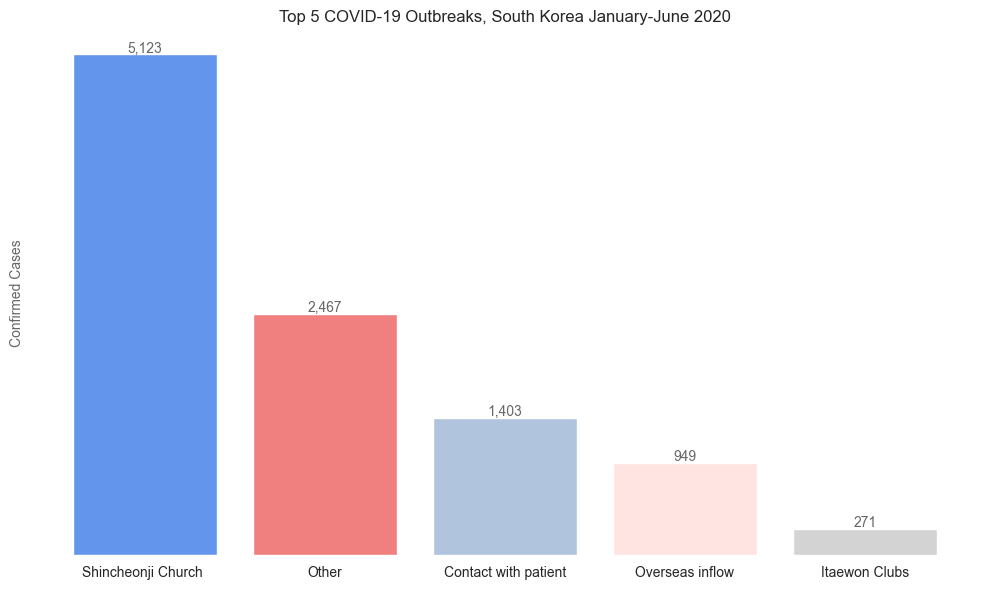

In [38]:
cases = biggest_cases_3_df['Case']
confirmed_cases = biggest_cases_3_df['Confirmed']

# Sort data in descending order based on confirmed cases
sorted_indices = np.argsort(confirmed_cases)[::-1]  # Indices that would sort confirmed_cases in descending order
sorted_cases = cases.iloc[sorted_indices].tolist()
sorted_confirmed_cases = confirmed_cases.iloc[sorted_indices].tolist()

colors = ['cornflowerblue', 'lightcoral', 'lightsteelblue', 'mistyrose', 'lightgray']

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_cases, sorted_confirmed_cases, color=colors)

# Adding title and labels
plt.title('Top 5 COVID-19 Outbreaks, South Korea January-June 2020')
plt.ylabel('Confirmed Cases', alpha=0.7)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Add labels on top of the bars
for bar, confirmed_cases in zip(bars, sorted_confirmed_cases):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{confirmed_cases:,}', 
             ha='center', va='bottom', alpha=0.7)

plt.yticks([])    
    
# Display the plot
plt.tight_layout()
plt.show()

Astonishing to see that the Shincheonji Church outbreak infected more people than cases labeled "other," a category which contains all other cases from the data save for those cases represented on this visual. I must also conclude that there is no doubt that some of the individual cases from the "other" category and maybe also "contact with patient" also source from Shincheonji Church (though I can't have any idea how many) because those categories are quite vague. At least some of the cases must have been categorized as "other" because there was a lack of information about the sources of infection.

That is to say, the Shincheonji Church outbreak was an extremely significant event in South Korea's 2020 COVID-19 experience. 

In [39]:
case_csv = '/Users/shanti/Downloads/archive (2)/Case.csv'
case_df = pd.read_csv(case_csv)
case_df.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


We can dive deeper into sources of infection. Our data contains many detailed entries tracing the sources of infections all over South Korea. Many infections were found provinces away from their finally determined initial outbreak location. Let's take a look at these outbreaks, their sources, and their spreads.

Our data has lots of geographic information, but there are some latitude and longitude values missing. I wrote a function to estimate them. My function appeared to work for all my entries but many of the Gyeongsangbuk-do entries for some reason were not placed correctly. I manually corrected them upon seeing the error on the map.

In [44]:
# Dictionary mapping provinces to their capital cities
province_capitals = {
    'Seoul': 'Seoul',
    'Busan': 'Busan',
    'Daegu': 'Daegu',
    'Incheon': 'Incheon',
    'Gwangju': 'Gwangju',
    'Daejeon': 'Daejeon',
    'Ulsan': 'Ulsan',
    'Sejong': 'Sejong',
    'Gyeonggi-do': 'Suwon',
    'Gangwon-do': 'Chuncheon',
    'Chungcheongbuk-do': 'Cheongju',
    'Chungcheongnam-do': 'Hongseong',
    'Jeollabuk-do': 'Jeonju',
    'Jeollanam-do': 'Muan',
    'Gyeongsangbuk-do': 'Andong',
    'Gyeongsangnam-do': 'Changwon',
    'Jeju-do': 'Jeju'
}

# Function to geocode the city and get its latitude and longitude
def get_coordinates(city, province):
    geolocator = Nominatim(user_agent = "abcd")
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        # If city is not found, fallback to capital city of the province
        capital_city = province_capitals.get(province)
        if capital_city:
            capital_location = geolocator.geocode(capital_city)
            if capital_location:
                return capital_location.latitude, capital_location.longitude
    return None, None

# Update missing latitude and longitude values based on city or capital city
for idx, row in case_df.iterrows():
    if row['latitude'] == '-' or row['longitude'] == '-':
        if row['city'] != 'from other city':
            latitude, longitude = get_coordinates(row['city'], row['province'])
            case_df.at[idx, 'latitude'] = latitude
            case_df.at[idx, 'longitude'] = longitude
        else:
            capital_city = province_capitals.get(row['province'])
            if capital_city:
                latitude, longitude = get_coordinates(capital_city, row['province'])
                case_df.at[idx, 'latitude'] = latitude
                case_df.at[idx, 'longitude'] = longitude

# Display the updated DataFrame
case_df.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


While working to create the upcoming visual, I found the Gyeongsangbuk-do cases had been plotted to an incorrect location -- at the North Korean/Chinese border. I knew from my research that Gyeongsangbuk-do was near Daegu. I investigated to find the specific latitudes and longitudes for all Gyeongsangbuk-do cases, in some cases making an educated guess.

In [45]:
case_df.iloc[[145, 149, 155, 156, 157], [6]] = 37.820770
case_df.iloc[[145, 149, 155, 156, 157], [7]] = 128.185913

case_df.iloc[[146], [6]] = 35.647301
case_df.iloc[[146], [7]] = 128.734847

case_df.iloc[[147], [6]] = 36.892500
case_df.iloc[[147], [7]] = 128.732400

case_df.iloc[[148, 152, 153], [6]] = 35.808971
case_df.iloc[[148, 152, 153], [7]] = 128.735504

case_df.iloc[[150], [6]] = 36.64630
case_df.iloc[[150], [7]] = 128.43760

case_df.iloc[[151], [6]] = 35.99500
case_df.iloc[[151], [7]] = 128.40170

case_df.iloc[[154], [6]] = 36.11955
case_df.iloc[[154], [7]] = 128.34447

In [46]:
# Define the color mapping
color_mapping = {
    "Itaewon Clubs": "green",
    "Shincheonji Church": "red",
    "contact with patient": "orange",
    "overseas inflow": "yellow",
    "Guro-gu Call Center": "blue",
    "Other": "gray"
}

# Calculate the maximum confirmed cases
max_confirmed = case_df['confirmed'].max()
# Adjust the circle radius multiplier based on the maximum confirmed cases
circle_radius_multiplier = 40000 / max_confirmed  # Adjust this value based on your data

# Create base map using Folium with CartoDB Positron tiles
map = folium.Map(location=[36.5, 127.5], zoom_start=7, tiles='cartodbpositron')

# Add circles to the map for each outbreak with the adjusted radius multiplier
for idx, row in case_df.iterrows():
    # Determine the color based on the infection case
    color = color_mapping.get(row['infection_case'], "gray")
    
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=row['confirmed']*circle_radius_multiplier,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.2,
        popup=f"{row['infection_case']} - {row['confirmed']} cases"
    ).add_to(map)

# Define the legend HTML
legend_html = '''
     <div style="position: fixed; bottom: 50px; left: 50px; width: 180px; background-color: white; 
     border:2px solid grey; z-index:9999; font-size:14px;">
     &nbsp; <b>Legend</b> <br>
     '''
for infection_case, color in color_mapping.items():
    legend_html += f'&nbsp; {infection_case} &nbsp; <i class="fa fa-circle" style="color:{color}"></i><br>'
legend_html += '</div>'

# Add the legend to the map
map.get_root().html.add_child(folium.Element(legend_html))

# Display the map in the notebook
display(map)

Somehow, Gyeongsangbuk-do is still plotted in the wrong location! You can see Gyeongsangbuk-do's cases in the northeast part of the country, when it should be much further south, near Daegu. I didn't have time to troubleshoot this further unfortunately. It does cast doubt on the accuracy of my visual overall. I inspected the visual and did not see any other obvious errors. Most likely the error is somewhere in my code, but I've reached the end of my expertise in troubleshooting this issue. Another possible cause of this strange error could be a problem within the Folium library. I decided to move on with my analysis despite this error.

This visual shows just how impactful the Shincheonji Church outbreak was -- it's outlier-sized. What does the map look like without it?

In [47]:
# Filter out rows where the infection case is "Shincheonji Church"
case_without_shincheonji_df = case_df[case_df['infection_case'] != 'Shincheonji Church']

# Adjust the circle radius multiplier based on the maximum confirmed cases (excluding Shincheonji Church)
max_confirmed_without_shincheonji = case_without_shincheonji_df['confirmed'].max()
circle_radius_multiplier = 55000 / max_confirmed_without_shincheonji  # Increase the multiplier for bigger circles

# Create base map using Folium with CartoDB Positron tiles
map = folium.Map(location=[36.5, 127.5], zoom_start=7, tiles='cartodbpositron')

# Define colors for specific infection cases
color_mapping = {
    "contact with patient": "orange",
    "overseas inflow": "yellow",
    "Itaewon Clubs": "green",
    "Guro-gu Call Center": "blue",
    "Other": "gray"
}

# Add circles to the map for each outbreak (excluding Shincheonji Church)
for idx, row in case_without_shincheonji_df.iterrows():
    # Determine color based on infection case
    color = color_mapping.get(row['infection_case'], "gray")
    
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=row['confirmed']*circle_radius_multiplier,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.2,
        popup=f"{row['infection_case']} - {row['confirmed']} cases"
    ).add_to(map)

# Add legend
legend_html = '''
     <div style="position: fixed; bottom: 50px; left: 50px; width: 190px; background-color: white; 
     border:2px solid grey; z-index:9999; font-size:14px;">
     &nbsp; <b>Legend</b> <br>
     '''
for infection_case, color in color_mapping.items():
    legend_html += f'&nbsp; {infection_case} &nbsp; <i class="fa fa-circle" style="color:{color}"></i><br>'
legend_html += '</div>'

# Add the legend to the map
map.get_root().html.add_child(folium.Element(legend_html))

# Display the map in the notebook
display(map)

Other outbreaks come into a bit more clarity when controlling for the Shincheonji Church outlier. "Contact with patient" and "overseas inflow" make up the largest bubbles on this map, with a couple of individual outbreaks just barely showing up. It also is clear that even controlled for the Shincheonji Church event, Daegu was a COVID-19 hot spot, still having more cases than any other province in South Korea. 

I interpret this to mean that the Shincheonji Church outbreak had even bigger ripples than could be recorded with what data collection was carried out. Some cases labeled "other," "etc," "contact with patient," or maybe even others certainly could have been connected to Shincheonji Church in some way. 

## Conclusions and Recommendations

The Shincheonji Church case showed up many times in my analysis. I investigated this incident through news reporting of the time and today. A 61 year old woman dubbed Patient 31 was identified as the spark that lit the fuse of this particular outbreak. She checked into a hospital on February 7 following a minor car accident, then the next day felt a sore throat. She went to the hospital when she was feverish, but left to attend church in Daegu while symptomatic. She pursued a COVID test on Monday, and was confirmed positive on Tuesday. It's unclear how Patient 31 was initially infected. On February 25th, officials publicly visited the church location in Daegu to request comprehensive lists of all members. 

Socially and legally, the Shincheonji Church received massive backlash as a result of the outbreak. An online petition requested the disbanding of the church received one million signatures. Press from around the world named the church as "shadowy" or "cult-like," describing Shincheonji members secretly entering other church's congregations in conversions attempts, as well as separating members from friends and family. Though it's hard to find verified information about the church, some news outlets including the New York Times described Shincheonji doctrine as calling sickness a sin that should not prevent one from worship or missionary work. The congregation was also described as required to sit extremely close together, sing loudly, and not cover their faces with anything, all damning details when considering how COVID-19 spreads. By July 2020, the South Korean government charged Lee Man-Hee, the leader and messiah of Shincheonji Church, with murder and for violating the Infectious Disease and Control Act by allegedly dragging his feet on releasing lists of Shincheonji Church members when requested by health officials in February. 

Lee Man-Hee was ultimately acquited of charges related to COVID-19, the court reaching the conclusion that information was not purposefully withheld or delayed. (He was found guilty of embezzeling church funds for private use.) Looking at the events, it stands out that South Korea did not implement any social distancing policy until February 29th. Patient 31 spread COVID-19 solidly 2 weeks prior. The only policies in place early in the pandemic were alerts.

South Korea has been lauded around the world for their COVID response. Free universally available testing, aggressive contact tracing, citizen alerts about new cases, and more led to a reduction of harm. But this was not the tune of South Korea's initial response to the pandemic. The overall attitude of the government was to downplay the severity of the pandemic and to hesitate in limiting travel with China. In the days following Patient 31's infection, while COVID-19 spread rapidly under the radar in the Shincheonji congregation, President Moon Jae-in assured the public that the outbreak would “disappear before long." The Prime Minister also told the public surgical masks were not necessary at this time. Following the Shincheonji Church outbreak, the government received backlash for being more eager to apply a "maximum containment" policy within their own borders than with China. 

All of these events lead me to the conclusion that political concerns interfered heavily with pandemic response in South Korea, and all nations are vulnerable to this. While the Shincheonji Church's practices may be distasteful, immoral, or illegal, as well as high risk in terms of spreading disease, it was primarily bad luck that lead it to be the epicenter of South Korea's early 2020 COVID-19 outbreaks. If there were no social distancing or travel rules in place, surely that is the fault of policy. The Shincheonji Church became a convenient scapegoat and pawn for political careers.

Of course, politics is always going to be influential where it shouldn't be.

As a result of my analysis of the data and the events of the time, I recommend the following pandemic response:

+ Free, universally available testing. This depends on if a test has been developed for the pandemic condition. Testing sites should be available across urban and rural locations. Representatives should also travel to administer tests, engaging as many people as possible.

+ Limiting travel from countries with the illness. This is a big move, and it's a tough decision to decide when to implement it. Clearly, South Korea implemented it too late with COVID -- but that's with the benefit of hindsight. 

+ Health education and resources in schools and for the public. Masks and hand washing stations should be widely available, with instructions on proper technique. People should be taught how illness in general spreads, and encouraged to think of others when they get sick.

+ Limiting large gatherings/social distance campaigns. This depends on how the illness spreads -- for some illnesses, it may be unnecessary.

+ Mental health and social health programs in schools and for the public. Organizations like Shincheonji Church do face high risk when it comes to a pandemic because of secrecy. Secret religious organizations that cut people off from their families or communities can be generally considered a social ill that harms individuals as well as populations when situations like this occur. How can we engage with people at risk for cult indoctrination? Mental health services seem a critical place to start. Dialectical Behavioral Therapy (DBT) helps individuals become more resilient and less vulnerable to negative influences, and lends itself well to group settings. It also is a kind of therapy that does not require disclosure of traumatic events to be helpful, making it again more appropriate for school or group settings. Creating a more mentally resilient population decreases the impact of negative influences such as cults, and also helps individuals judge risk more effectively, and generally make more balanced decisions. 

